<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/Real_Estate_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

house= pd.read_csv('/content/sample_data/Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
house.corr()

<ipython-input-48-dea6bbb23e39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [49]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [50]:
house=house[['price', 'area', 'bedrooms', 'bathrooms', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus']]
house.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,furnished


In [51]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [52]:
house[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning']]=house[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning']].applymap(lambda word: 1 if word=='yes' else 0)
house

<ipython-input-52-a1055a8d2c4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning']]=house[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning']].applymap(lambda word: 1 if word=='yes' else 0)


,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,1,0,0,0,1,2,furnished
1,12250000,8960,4,4,1,0,0,0,1,3,furnished
2,12250000,9960,3,2,1,0,1,0,0,2,semi-furnished
3,12215000,7500,4,2,1,0,1,0,1,3,furnished
4,11410000,7420,4,1,1,1,1,0,1,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,0,2,unfurnished
541,1767150,2400,3,1,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,0,0,0,0,0,0,furnished


<ipython-input-53-4e28bcc9bdb8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house.corr(),annot=True);


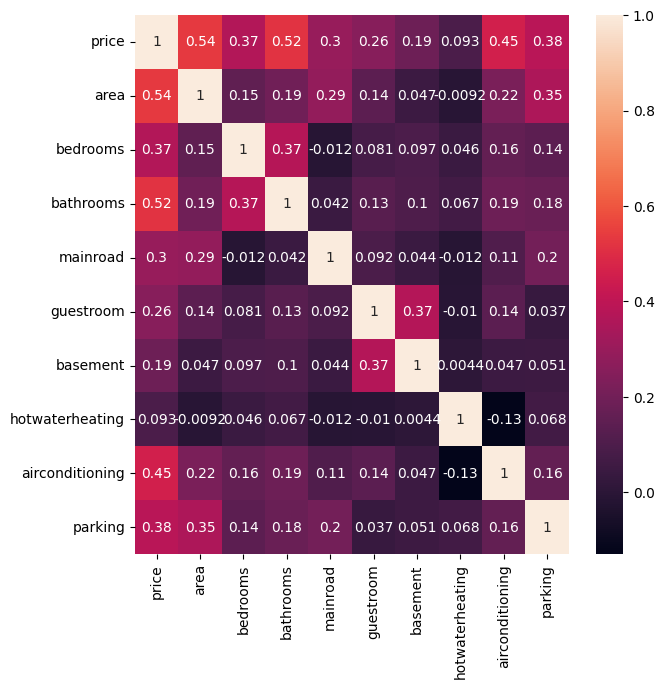

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(house.corr(),annot=True);

In [54]:
house=house.drop(['hotwaterheating','furnishingstatus'],axis=1)
house.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking
0,13300000,7420,4,2,1,0,0,1,2
1,12250000,8960,4,4,1,0,0,1,3
2,12250000,9960,3,2,1,0,1,0,2
3,12215000,7500,4,2,1,0,1,1,3
4,11410000,7420,4,1,1,1,1,1,2


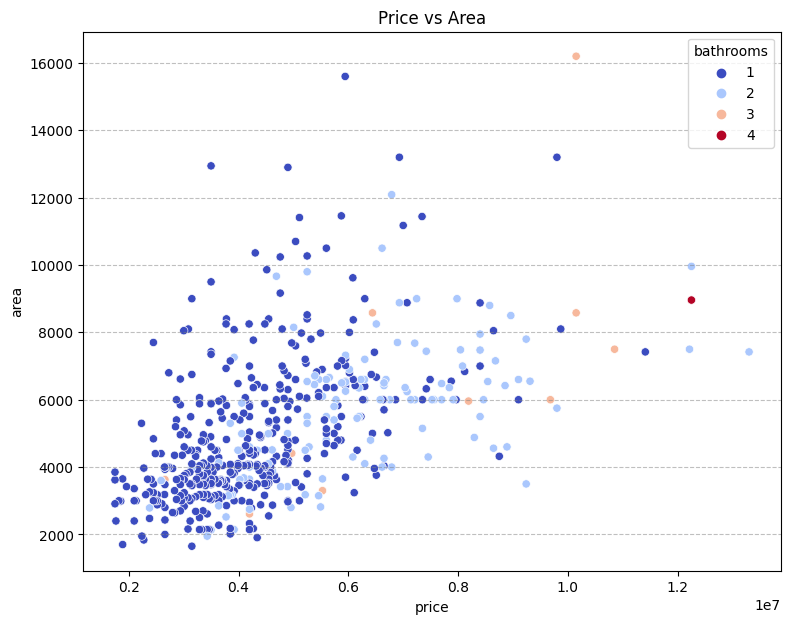

In [55]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=house,x='price',y='area',hue='bathrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')
plt.show()

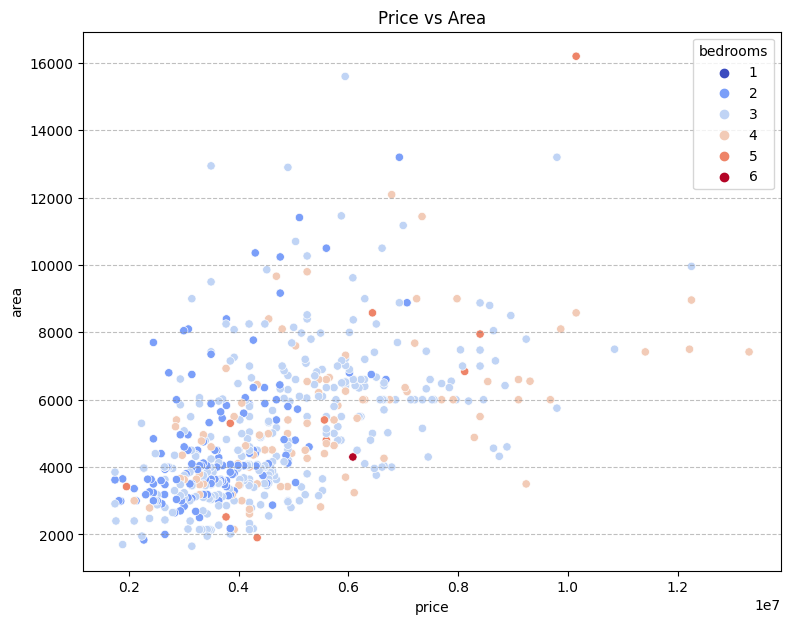

In [56]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=house,x='price',y='area',hue='bedrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area')
plt.show()

In [57]:
y=house.price
X=house[['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'airconditioning', 'parking']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
house_model = DecisionTreeRegressor(random_state=1)
house_model.fit(train_X,train_y)
DecisionTreeRegressor(random_state=1)
val_predict= house_model.predict(val_X)
val_mae = mean_absolute_error(val_predict, val_y)

In [58]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [59]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
print('the optimal amount of nodes is:',best_tree_size)

the optimal amount of nodes is: 50


In [60]:
final_model = DecisionTreeRegressor(max_leaf_nodes=50,random_state=1)
final_model.fit(train_X, train_y)
DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

In [61]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'airconditioning', 'parking'],
      dtype='object')

In [62]:
df_test = pd.DataFrame(columns=['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking'])

for i in range(545):
    row = {
        'area': np.random.randint(500, 5000),
        'bedrooms': np.random.randint(1, 6),
        'bathrooms': np.random.randint(1, 4),
        'mainroad': np.random.choice([0, 1]),
        'guestroom': np.random.choice([0, 1]),
        'basement': np.random.choice([0, 1]),
        'airconditioning': np.random.choice([0,1]),
        'parking': np.random.randint(0, 4)
    }
    df_test = df_test.append(row, ignore_index=True)
df_test

<ipython-input-62-06994358b556>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(row, ignore_index=True)
<ipython-input-62-06994358b556>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(row, ignore_index=True)
<ipython-input-62-06994358b556>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(row, ignore_index=True)
<ipython-input-62-06994358b556>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append(row, ignore_index=True)
<ipython-input-62-06994358b556>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking
0,2712,3,2,0,0,1,1,2
1,2011,3,3,0,0,1,1,0
2,2419,1,1,0,1,1,1,2
3,4900,3,3,0,1,0,0,1
4,1656,3,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...
540,868,1,3,1,0,1,0,0
541,4780,1,1,0,1,1,1,0
542,4395,2,1,0,0,0,1,1
543,4808,2,2,1,1,0,0,1


In [63]:
val_pred_test= final_model.predict(df_test)
val_pred_test

array([4621400.        , 4621400.        , 3780984.375     ,
       4783100.        , 3780984.375     , 2756381.25      ,
       4621400.        , 4277000.        , 3780984.375     ,
       4621400.        , 4561265.625     , 4621400.        ,
       2756381.25      , 3780984.375     , 4277000.        ,
       4277000.        , 4783100.        , 8767500.        ,
       5148500.        , 4621400.        , 4621400.        ,
       4561265.625     , 3780984.375     , 4783100.        ,
       4621400.        , 3920000.        , 3140666.66666667,
       4161500.        , 4621400.        , 4621400.        ,
       4277000.        , 4161500.        , 2756381.25      ,
       4277000.        , 3581640.32258065, 8767500.        ,
       5495000.        , 6729333.33333333, 4277000.        ,
       4621400.        , 4621400.        , 8767500.        ,
       8767500.        , 3780984.375     , 3581640.32258065,
       4621400.        , 4161500.        , 3920000.        ,
       4161500.        ,

In [64]:
df_test['price']= val_pred_test
move_column = df_test.pop('price')
df_test.insert(0, 'price', move_column)
df_test

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking
0,4.621400e+06,2712,3,2,0,0,1,1,2
1,4.621400e+06,2011,3,3,0,0,1,1,0
2,3.780984e+06,2419,1,1,0,1,1,1,2
3,4.783100e+06,4900,3,3,0,1,0,0,1
4,3.780984e+06,1656,3,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...
540,4.161500e+06,868,1,3,1,0,1,0,0
541,4.693850e+06,4780,1,1,0,1,1,1,0
542,3.140667e+06,4395,2,1,0,0,0,1,1
543,4.783100e+06,4808,2,2,1,1,0,0,1


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    float64
 1   area             545 non-null    object 
 2   bedrooms         545 non-null    object 
 3   bathrooms        545 non-null    object 
 4   mainroad         545 non-null    object 
 5   guestroom        545 non-null    object 
 6   basement         545 non-null    object 
 7   airconditioning  545 non-null    object 
 8   parking          545 non-null    object 
dtypes: float64(1), object(8)
memory usage: 38.4+ KB


In [66]:
df_test=df_test[['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'airconditioning', 'parking']].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   mainroad         545 non-null    int64
 5   guestroom        545 non-null    int64
 6   basement         545 non-null    int64
 7   airconditioning  545 non-null    int64
 8   parking          545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


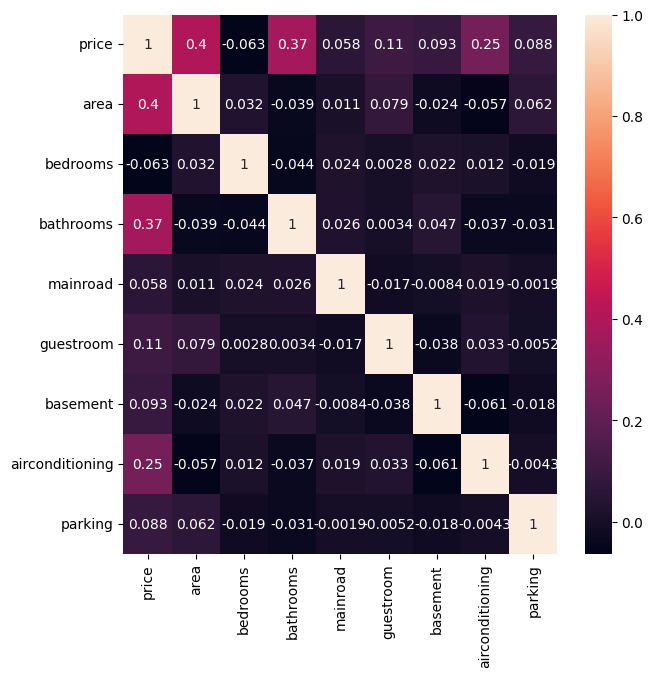

In [67]:
plt.figure(figsize=(7,7))
sns.heatmap(df_test.corr(),annot=True);

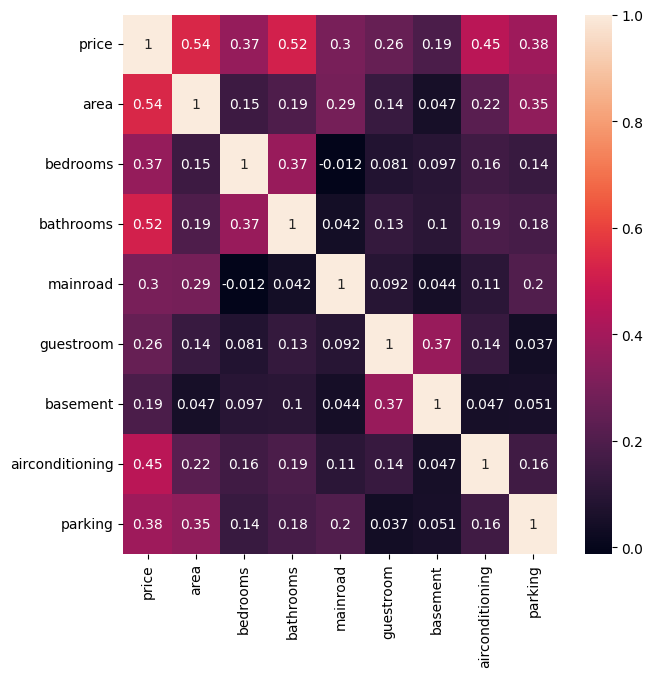

In [68]:
plt.figure(figsize=(7,7))
sns.heatmap(house.corr(),annot=True);

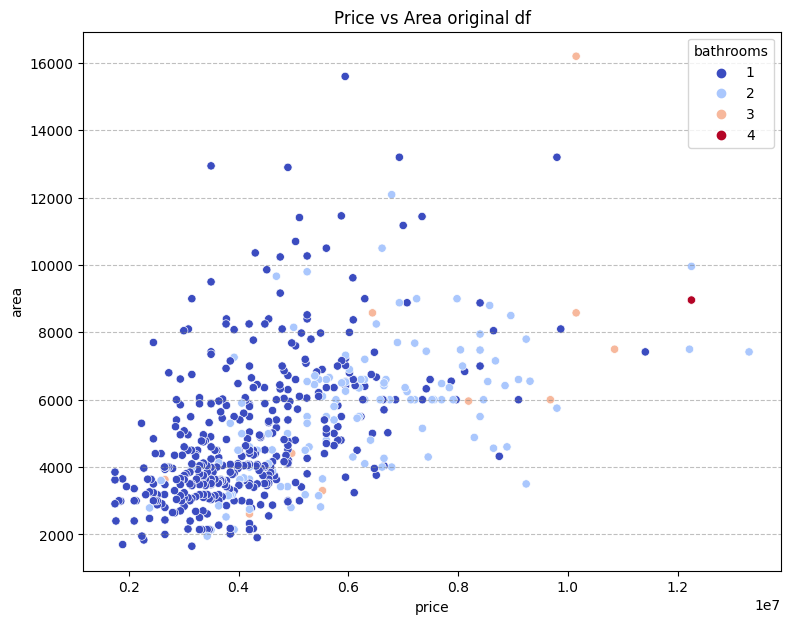

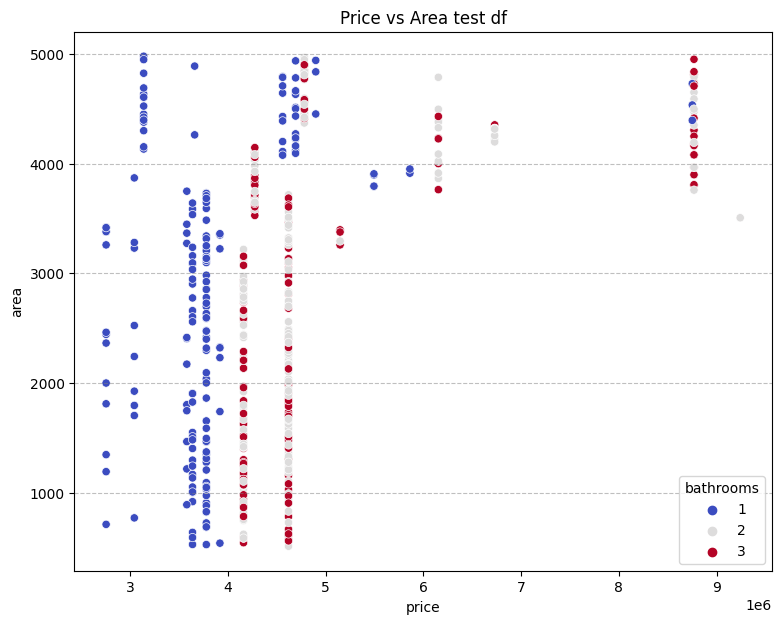

In [69]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=house,x='price',y='area',hue='bathrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area original df')
plt.figure(figsize=(9,7))
sns.scatterplot(data=df_test,x='price',y='area',hue='bathrooms',palette='coolwarm')
plt.grid(axis='y', color='gray', linestyle='--', alpha=0.5)
plt.title('Price vs Area test df')
plt.show()